In [ ]:
!unzip /content/drive/MyDrive/brats23/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData.zip -d /content/

In [2]:
!pip install split-folders

In [4]:
!pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 11.6 MB/s eta 0:00:33
   ---------------------------------------- 0.6/377.0 MB 10.1 MB/s eta 0:00:38
   ---------------------------------------- 1.1/377.0 MB 9.9 MB/s eta 0:00:39
   ---------------------------------------- 1.5/377.0 MB 9.5 MB/s eta 0:00:40
   ---------------------------------------- 1.9/377.0 MB 9.5 MB/s eta 0:00:40
   ---------------------------------------- 2.4/377.0 MB 9.6 MB/s eta 0:00:39
   ---------------------------------------- 2.9/377.0 MB 9.6 MB/s eta 0:00:40
   ---------------------------------------- 3.3/377.0 MB 10.0 MB/s eta 0:00:38
   ---------------------------------------- 3.8/377.0 M

In [2]:
pip install nibabel

  Using cached nibabel-5.2.1-py3-none-any.whl.metadata (8.8 kB)
Using cached nibabel-5.2.1-py3-none-any.whl (3.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/377.1 MB 10.9 MB/s eta 0:00:35
   ---------------------------------------- 2.1/377.1 MB 22.1 MB/s eta 0:00:17
   ---------------------------------------- 2.1/377.1 MB 16.8 MB/s eta 0:00:23
   ---------------------------------------- 2.9/377.1 MB 16.6 MB/s eta 0:00:23
   ----

In [1]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import random
#import splitfolders


In [8]:
#SKIP----------------------------SKIP

import tensorflow as tf

gpu_memory_limit = 6000

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_virtual_device_configuration(gpu, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=gpu_memory_limit)])
      logical_gpus = tf.config.experimental.list_logical_devices('GPU')
  except RuntimeError as e:
    print(e)

In [5]:
import os
import torch

gpu_memory_limit = 6000  # Limita la memoria GPU a 6000 MB (6 GB)

# Imposta la variabile d'ambiente CUDA_VISIBLE_DEVICES
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Sostituisci '0' con l'ID della GPU che vuoi utilizzare

# Controlla se CUDA (GPU) è disponibile
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Se CUDA è disponibile, imposta la limitazione della memoria
if torch.cuda.is_available():
    torch.cuda.set_per_process_memory_fraction(gpu_memory_limit / torch.cuda.get_device_properties(0).total_memory)

# Ora puoi iniziare a creare e addestrare il tuo modello PyTorch


In [4]:
import torch

if torch.cuda.is_available():
    print("CUDA è disponibile! Puoi utilizzare la GPU per l'accelerazione.")
else:
    print("CUDA non è disponibile. Utilizzerai la CPU per l'elaborazione.")

CUDA è disponibile! Puoi utilizzare la GPU per l'accelerazione.


In [5]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.current_device()
    print(f"Nome della GPU: {torch.cuda.get_device_name(device)}")
    print(f"Numero di GPU nel sistema: {torch.cuda.device_count()}")


Nome della GPU: NVIDIA GeForce GTX 1060 6GB
Numero di GPU nel sistema: 1


In [6]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.current_device()
    print(f"Stai utilizzando il dispositivo CUDA: {torch.cuda.get_device_name(device)}")
else:
    print("CUDA non è disponibile. Utilizzerai la CPU per l'elaborazione.")


Stai utilizzando il dispositivo CUDA: NVIDIA GeForce GTX 1060 6GB


In [32]:
scaler = MinMaxScaler()
TRAIN_DATASET_PATH = 'ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'
VAL_DATASET_PATH = 'ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData'
#TRAIN_DATASET_PATH = "/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"

In [6]:
#test_image_flair = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2f.nii.gz").get_fdata()
test_image_flair = nib.load('brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t2f.nii.gz').get_fdata()

print(test_image_flair.shape)
print(test_image_flair.max())

(240, 240, 155)
2934.0


In [10]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.min())
print(test_image_flair.max())

0.0
1.0


In [11]:
#test_image_t1 = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()
test_image_t1 = nib.load("brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()


test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

print(test_image_t1.min())
print(test_image_t1.max())

0.0
1.0


In [12]:
#test_image_t1c = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1c.nii.gz").get_fdata()
test_image_t1c = nib.load("brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1c.nii.gz").get_fdata()

test_image_t1c = scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)

print(test_image_t1c.min())
print(test_image_t1c.max())

0.0
1.0


In [13]:
#test_image_t2 = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2w.nii.gz").get_fdata()
test_image_t2 = nib.load("brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t2w.nii.gz").get_fdata()


test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)


print(test_image_t2.min())
print(test_image_t2.max())

0.0
1.0


In [14]:
#test_mask = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz").get_fdata()
test_mask = nib.load("brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-seg.nii.gz").get_fdata()


test_mask = test_mask.astype(np.uint8)
print(np.unique(test_mask))

[0 1 2 3]


In [5]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:, :, n_slice], cmap="gray")
plt.title("FLAIR")

plt.subplot(232)
plt.imshow(test_image_t1[:, :, n_slice], cmap="gray")
plt.title("T1")

plt.subplot(233)
plt.imshow(test_image_t1c[:, :, n_slice], cmap="gray")
plt.title("T1C")

plt.subplot(234)
plt.imshow(test_image_t2[:, :, n_slice], cmap="gray")
plt.title("T2")

plt.subplot(235)
plt.imshow(test_mask[:, :, n_slice], cmap="gray")
plt.title("MASK")

plt.show()

NameError: name 'test_mask' is not defined

In [22]:
combined_x = np.stack([test_image_flair, test_image_t1c, test_image_t2], axis = 3)
combined_x.shape

(240, 240, 155, 3)

In [23]:
combined_x = combined_x[56:184, 56:184, 13:141]
combined_x.shape
test_mask = test_mask[56:184, 56:184, 13:141]
test_mask.shape

(128, 128, 128, 4)

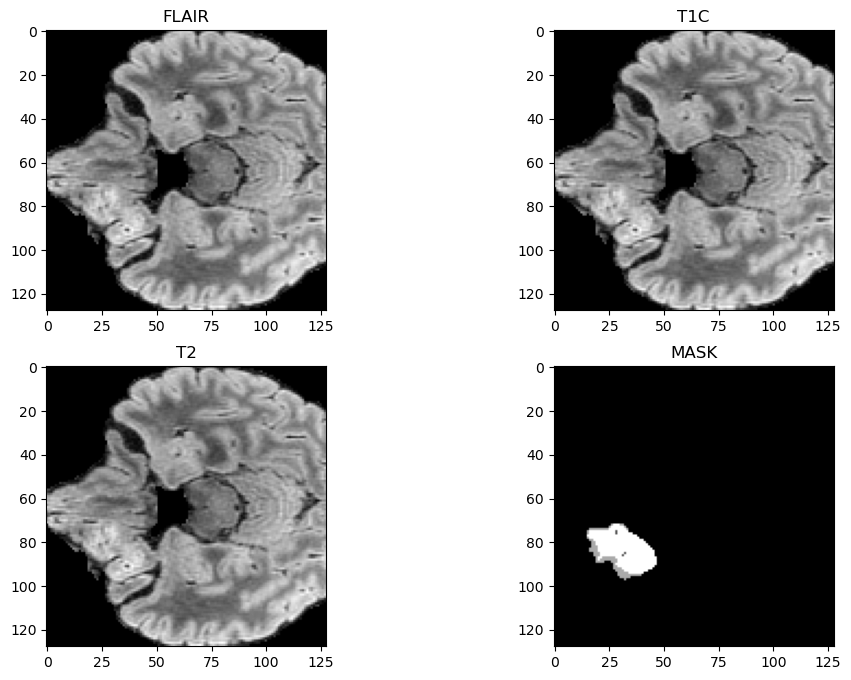

In [18]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:, :, n_slice,0], cmap="gray")
plt.title("FLAIR")

plt.subplot(222)
plt.imshow(combined_x[:, :, n_slice,0], cmap="gray")
plt.title("T1C")

plt.subplot(223)
plt.imshow(combined_x[:, :, n_slice,0], cmap="gray")
plt.title("T2")

plt.subplot(224)
plt.imshow(test_mask[:, :, n_slice], cmap="gray")
plt.title("MASK")

plt.show()

In [24]:
test_mask = to_categorical(test_mask, num_classes=4)

In [19]:
#test_image_t2 = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()
test_image_t2 = nib.load("brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()


test_image_t2 = test_image_t2.astype(np.uint8)
print(np.unique(test_image_t2))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [20]:
#test_mask = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz").get_fdata()
test_mask = nib.load("brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-seg.nii.gz").get_fdata()

test_mask = test_mask.astype(np.uint8)
print(np.unique(test_mask))

[0 1 2 3]


# IMAGES

In [33]:
t2_list = sorted(glob.glob(TRAIN_DATASET_PATH + "/*/*t2w.nii.gz"))
t1ce_list = sorted(glob.glob(TRAIN_DATASET_PATH + "/*/*t1c.nii.gz"))
flair_list = sorted(glob.glob(TRAIN_DATASET_PATH + "/*/*t2f.nii.gz"))
mask_list = sorted(glob.glob(TRAIN_DATASET_PATH + "/*/*seg.nii.gz"))

In [34]:
for img in range(len(t2_list)):
  print('Now preparing image and mask number: ', img)

  temp_image_t2 = nib.load(t2_list[img]).get_fdata()
  temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

  temp_image_flair = nib.load(flair_list[img]).get_fdata()
  temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

  temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
  temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

  temp_mask = nib.load(mask_list[img]).get_fdata()
  temp_mask = temp_mask.astype(np.uint8)

  temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis = 3)

  #crop to a size divisible by 64 to work later with patches by 64x64x64

  temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
  temp_mask = temp_mask[56:184, 56:184, 13:141]

  val, counts = np.unique(temp_mask, return_counts=True)

  if (1 - (counts[0]/counts.sum())) > 0.01:
    print('Save me')
    temp_mask = to_categorical(temp_mask, num_classes=4)
    #np.save('/content/input3dChannel/images/image_'+str(img)+'.npy', temp_combined_images)
    #np.save('/content/input3dChannel/masks/mask_'+str(img)+'.npy', temp_mask)
    np.save('brats23-TrainingData\input3Channel\images\image_'+str(img)+'.npy', temp_combined_images)
    np.save('brats23-TrainingData\input3Channel\masks\mask_'+str(img)+'.npy', temp_mask)
  else:
    print('Skip me')


<>:30: SyntaxWarning: invalid escape sequence '\i'
<>:31: SyntaxWarning: invalid escape sequence '\i'
<>:30: SyntaxWarning: invalid escape sequence '\i'
<>:31: SyntaxWarning: invalid escape sequence '\i'
C:\Users\simon\AppData\Local\Temp\ipykernel_5388\4184176745.py:30: SyntaxWarning: invalid escape sequence '\i'
  np.save('brats23-TrainingData\input3Channel\images\image_'+str(img)+'.npy', temp_combined_images)
C:\Users\simon\AppData\Local\Temp\ipykernel_5388\4184176745.py:31: SyntaxWarning: invalid escape sequence '\i'
  np.save('brats23-TrainingData\input3Channel\masks\mask_'+str(img)+'.npy', temp_mask)


Now preparing image and mask number:  0
Save me
Now preparing image and mask number:  1
Save me
Now preparing image and mask number:  2
Save me
Now preparing image and mask number:  3
Save me
Now preparing image and mask number:  4
Save me
Now preparing image and mask number:  5
Skip me
Now preparing image and mask number:  6
Skip me
Now preparing image and mask number:  7
Skip me
Now preparing image and mask number:  8
Save me
Now preparing image and mask number:  9
Save me
Now preparing image and mask number:  10
Save me
Now preparing image and mask number:  11
Save me
Now preparing image and mask number:  12
Save me
Now preparing image and mask number:  13
Save me
Now preparing image and mask number:  14
Save me
Now preparing image and mask number:  15
Save me
Now preparing image and mask number:  16
Save me
Now preparing image and mask number:  17
Save me
Now preparing image and mask number:  18
Save me
Now preparing image and mask number:  19
Save me
Now preparing image and mask n

In [32]:
VAL_DATASET_PATH = 'brats2023\ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData'
t2_list_val = sorted(glob.glob(VAL_DATASET_PATH + "/*/*t2w.nii.gz"))
t1ce_list_val = sorted(glob.glob(VAL_DATASET_PATH + "/*/*t1c.nii.gz"))
flair_list_val = sorted(glob.glob(VAL_DATASET_PATH + "/*/*t2f.nii.gz"))



In [33]:
#VALIDATIN DATA

for img in range(len(t2_list)):
  print('Now preparing image and mask number: ', img)

  temp_image_t2 = nib.load(t2_list_val[img]).get_fdata()
  temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

  temp_image_flair = nib.load(flair_list_val[img]).get_fdata()
  temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

  temp_image_t1c = nib.load(t1ce_list_val[img]).get_fdata()
  temp_image_t1c = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)


  temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis = 3)

  #crop to a size divisible by 64 to work later with patches by 64x64x64

  temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]

  val, counts = np.unique(temp_mask, return_counts=True)

  if (1 - (counts[0]/counts.sum())) > 0.01:
    print('Save me')
    #temp_mask = to_categorical(temp_mask, num_classes=4)
    #np.save('/content/input3dChannel/images/image_'+str(img)+'.npy', temp_combined_images)
    #np.save('/content/input3dChannel/masks/mask_'+str(img)+'.npy', temp_mask)
    np.save('brats23-ValidationData\input3Channel\images\image_'+str(img)+'.npy', temp_combined_images)
    np.save('brats23-ValidationData\input3Channel\masks\mask_'+str(img)+'.npy', temp_mask)
  else:
    print('Skip me')

Now preparing image and mask number:  0


IndexError: list index out of range

In [36]:
pip install splitfolders

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders


In [2]:
import splitfolders

#input_folder = '/content/input3dChannel'
#output_folder = '/content/input_data_128'
input_folder = 'brats23-TrainingData\\input3Channel'
output_folder = 'brats23-TrainingData\\input_data_128'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.80, .20), group_prefix=None)

Copying files: 1137 files [17:41,  1.11s/ files]

OSError: [WinError 112] Spazio su disco insufficiente

In [7]:
import os


def load_img(img_dir, img_list):
  images = []
  for i, img_name in enumerate(img_list):
    if (img_name.split('.')[-1] == 'npy'):
      image = np.load(img_dir+ '/' +img_name)

      images.append(image)

  images = np.array(images)
  return(images)


def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

  L = len(img_list)

  while True:

    batch_start = 0
    batch_end = batch_size

    while batch_start < L:
      limit = min(batch_end, L)
      X = load_img(img_dir, img_list[batch_start:limit])
      Y = load_img(mask_dir, mask_list[batch_start:limit])

      yield X, Y

      batch_start += batch_size
      batch_end += batch_size


In [7]:
from matplotlib import pyplot as plt
import random

train_img_dir = 'Little_brats2023/input_data_128/train/images'
train_mask_dir = 'Little_brats2023/input_data_128/train/masks'
train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

print(len(train_img_list))
print(len(train_mask_list))

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

img, msk = train_img_datagen.__next__()

img_num  = random.randint(0, img.shape[0]-1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()



260
260


NameError: name 'imageLoader' is not defined

In [8]:
import torch
import torch.nn as nn
import torch.utils.checkpoint as checkpoint

class SimpleUNet(nn.Module):
    def __init__(self, img_height, img_width, img_depth, img_channels, num_classes):
        super(SimpleUNet, self).__init__()

        # Definizione dei layers per il percorso di contrazione (contraction path)
        self.c1 = nn.Sequential(
            nn.Conv3d(img_channels, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Conv3d(16, 16, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.p1 = nn.MaxPool3d(kernel_size=2, stride=2)

        self.c2 = nn.Sequential(
            nn.Conv3d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Conv3d(32, 32, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.p2 = nn.MaxPool3d(kernel_size=2, stride=2)

        self.c3 = nn.Sequential(
            nn.Conv3d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv3d(64, 64, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.p3 = nn.MaxPool3d(kernel_size=2, stride=2)

        self.c4 = nn.Sequential(
            nn.Conv3d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv3d(128, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.p4 = nn.MaxPool3d(kernel_size=2, stride=2)

        self.c5 = nn.Sequential(
            nn.Conv3d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Conv3d(256, 256, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # Definizione dei layers per il percorso espansivo (expansive path)
        self.u6 = nn.ConvTranspose3d(256, 128, kernel_size=2, stride=2)
        self.c6 = nn.Sequential(
            nn.Conv3d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv3d(128, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.u7 = nn.ConvTranspose3d(128, 64, kernel_size=2, stride=2)
        self.c7 = nn.Sequential(
            nn.Conv3d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv3d(64, 64, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.u8 = nn.ConvTranspose3d(64, 32, kernel_size=2, stride=2)
        self.c8 = nn.Sequential(
            nn.Conv3d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Conv3d(32, 32, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.u9 = nn.ConvTranspose3d(32, 16, kernel_size=2, stride=2)
        self.c9 = nn.Sequential(
            nn.Conv3d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Conv3d(16, 16, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # Output layer
        self.outputs = nn.Conv3d(16, num_classes, kernel_size=1, stride=1)

    def forward(self, x):
        def _forward(x):
            # Contracting path (encoder)
            c1 = self.c1(x)
            p1 = self.p1(c1)

            c2 = self.c2(p1)
            p2 = self.p2(c2)

            c3 = self.c3(p2)
            p3 = self.p3(c3)

            c4 = self.c4(p3)
            p4 = self.p4(c4)

            c5 = self.c5(p4)

            # Expanding path (decoder)
            u6 = self.u6(c5)
            concat6 = torch.cat([u6, c4], dim=1)
            c6 = self.c6(concat6)

            u7 = self.u7(c6)
            concat7 = torch.cat([u7, c3], dim=1)
            c7 = self.c7(concat7)

            u8 = self.u8(c7)
            concat8 = torch.cat([u8, c2], dim=1)
            c8 = self.c8(concat8)

            u9 = self.u9(c8)
            concat9 = torch.cat([u9, c1], dim=1)
            c9 = self.c9(concat9)

            # Output
            outputs = self.outputs(c9)
            return outputs

        # Use checkpointing to reduce memory usage
        return checkpoint.checkpoint(_forward, x)

# Test per verificare la costruzione del modello
img_height = 128
img_width = 128
img_depth = 128
img_channels = 3
num_classes = 4

model = SimpleUNet(img_height, img_width, img_depth, img_channels, num_classes)
print(model)

SimpleUNet(
  (c1): Sequential(
    (0): Conv3d(3, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): ReLU()
  )
  (p1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Sequential(
    (0): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): ReLU()
  )
  (p2): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Sequential(
    (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): ReLU()
  )
  (p3): MaxPool3d(kernel_size=2, s

In [13]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want

def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.
    model.summary()

    return model

#Test if everything is working ok.
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_19 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_1[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv3d_19[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_20 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_9[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_4     │ (None, 64, 64,    │          0 │ conv3d_20[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_21 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_4[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv3d_21[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_22 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_10[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_5     │ (None, 32, 32,    │          0 │ conv3d_22[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_23 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_5[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv3d_23[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_24 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_11[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_6     │ (None, 16, 16,    │          0 │ conv3d_24[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_25 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_6[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 16, 16,    │          0 │ conv3d_25[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_26 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_12[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_7     │ (None, 8, 8, 8,   │          0 │ conv3d_26[0][0] 

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)


(128, 128, 128, 4)
(128, 128, 128)


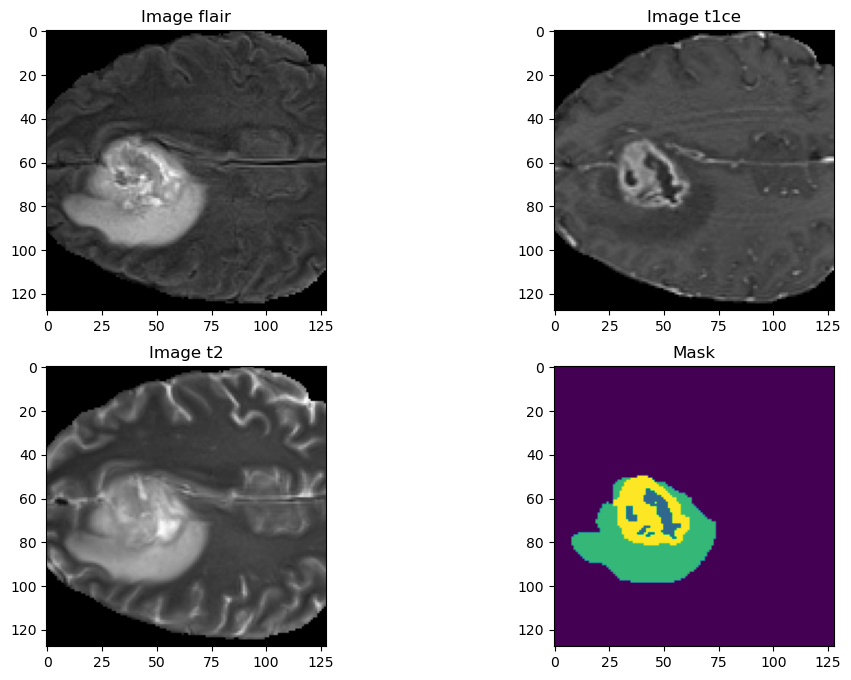

In [9]:
import os
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random



####################################################
train_img_dir = "Little_brats2023\\input_data_128\\train\\images"
train_mask_dir = "Little_brats2023\\input_data_128\\train\\masks"

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir + '\\' + img_list[img_num])
test_mask = np.load(train_mask_dir + '\\' + msk_list[img_num])
print(test_mask.shape)
test_mask = np.argmax(test_mask, axis=3)
print(test_mask.shape)
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [10]:
#Define the image generators for training and validation

train_img_dir = "Little_brats2023\\input_data_128\\train\\images"
train_mask_dir = "Little_brats2023\\input_data_128\\train\\masks"

val_img_dir = "Little_brats2023\\input_data_128\\val\\images"
val_mask_dir = "Little_brats2023\\input_data_128\\val\\masks"

train_img_list= sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

val_img_list=sorted(os.listdir(val_img_dir))
val_mask_list = sorted(os.listdir(val_mask_dir))
##################################

########################################################################
batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

NameError: name 'imageLoader' is not defined

In [11]:
import torch
import torch.nn as nn

class DiceLoss(nn.Module):
    def __init__(self, class_weights=None, smooth=1e-7):
        super(DiceLoss, self).__init__()
        self.smooth = smooth
        self.class_weights = class_weights

    def forward(self, y_pred, y_true):
        # y_pred shape: (batch_size, num_classes, depth, height, width)
        # y_true shape: (batch_size, depth, height, width)

        # Flatten predictions and labels
        y_pred = y_pred.view(y_pred.size(0), y_pred.size(1), -1)  # (batch_size, num_classes, -1)
        y_true = y_true.view(y_true.size(0), -1)  # (batch_size, -1)

        # Compute intersection and union for each class
        intersection = torch.sum(y_pred * y_true.unsqueeze(1), dim=2)  # (batch_size, num_classes)
        union = torch.sum(y_pred, dim=2) + torch.sum(y_true, dim=1)  # (batch_size, num_classes)

        # Calculate Dice score
        dice_score = (2. * intersection + self.smooth) / (union + self.smooth)  # (batch_size, num_classes)

        # Apply class weights if provided
        if self.class_weights is not None:
            dice_score = dice_score * self.class_weights.unsqueeze(0)  # Broadcasting

        # Average Dice score across classes and take negative for loss
        dice_loss = 1.0 - torch.mean(dice_score, dim=1)  # (batch_size,)
        return torch.mean(dice_loss)  # Scalar loss


In [12]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, class_weights=None, smooth=1e-7):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.smooth = smooth
        self.class_weights = class_weights

    def forward(self, y_pred, y_true):
        # Compute BCE loss
        bce_loss = F.binary_cross_entropy_with_logits(y_pred, y_true, reduction='none')

        # Compute focal weights
        pt = torch.exp(-bce_loss)
        focal_weight = (self.alpha * y_true + (1 - self.alpha) * (1 - y_true)) * (1 - pt) ** self.gamma

        # Apply class weights if provided
        if self.class_weights is not None:
            focal_weight = focal_weight * self.class_weights.unsqueeze(0).unsqueeze(-1).unsqueeze(-1)  # Broadcasting

        # Compute final focal loss
        focal_loss = torch.mean(focal_weight * bce_loss)

        return focal_loss

def combine_losses(loss1, loss2, weight1, weight2):
    def combined_loss(y_pred, y_true):
        return weight1 * loss1(y_pred, y_true) + weight2 * loss2(y_pred, y_true)
    return combined_loss


In [13]:
class IOU(nn.Module):
    def __init__(self, threshold=0.5):
        super(IOU, self).__init__()
        self.threshold = threshold

    def forward(self, y_pred, y_true):
        # y_pred shape: (batch_size, num_classes, depth, height, width)
        # y_true shape: (batch_size, depth, height, width)

        y_pred = (y_pred > self.threshold).float()
        intersection = torch.sum(y_pred * y_true, dim=(2, 3, 4))
        union = torch.sum(y_pred + y_true, dim=(2, 3, 4)) - intersection

        iou = (intersection + 1e-7) / (union + 1e-7)

        return torch.mean(iou)


In [15]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset

class CustomSegmentationDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.image_dir = os.path.join(root_dir, 'images')
        self.mask_dir = os.path.join(root_dir, 'masks')
        self.image_list = os.listdir(self.image_dir)
        self.mask_list = os.listdir(self.mask_dir)

    def __len__(self):
        return len(self.image_list)  # o len(self.mask_list), se preferisci basarti sulle maschere

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.image_list[idx])
        mask_name = os.path.join(self.mask_dir, self.mask_list[idx])

        # Carica i file npy come array numpy
        image = np.load(img_name)
        mask = np.load(mask_name)

        # Converte in tensori PyTorch
        image = torch.from_numpy(image).float()
        mask = torch.from_numpy(mask).float()

        return {'image': image, 'mask': mask}


In [16]:
train_dataset = CustomSegmentationDataset(root_dir='Little_brats2023\\input_data_128\\train')
val_dataset = CustomSegmentationDataset(root_dir='Little_brats2023\\input_data_128\\val')


In [17]:
sample = train_dataset[0]
image = sample['image']
mask = sample['mask']
print(image.shape)  # Stampa la forma del tensore dell'immagine
print(mask.shape)

torch.Size([128, 128, 128, 3])
torch.Size([128, 128, 128, 4])


In [18]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Verifica della memoria attualmente allocata
print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024**2:.2f} MB")


Memory allocated: 0.00 MB


In [19]:
print(f"Model is on {next(model.parameters()).device}")

Model is on cpu


In [34]:
pip install GPUtil

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7400 sha256=d19d1685bdd5d3edd52a12f069d902119e5b93ef72c9f3d3c9e7156da82b05cb
  Stored in directory: c:\users\simon\appdata\local\pip\cache\wheels\92\a8\b7\d8a067c31a74de9ca252bbe53dea5f896faabd25d55f541037
Successfully built GPUtil
Note: you may need to restart the kernel to use updated packages.


In [22]:

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache() 

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  1% | 14% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  3% | 14% |


In [23]:
torch.backends.cuda.reserved_memory = 6 * 1024**3  # Limita a 2GB di memoria GPU


In [26]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=xxx'

In [28]:
print(f"Allocated: {torch.cuda.memory_allocated(device) / 1024**2:.2f} MB")
print(f"Cached: {torch.cuda.memory_reserved(device) / 1024**2:.2f} MB")


Allocated: 0.00 MB
Cached: 0.00 MB


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Definizione del modello (esempio, sostituisci con il tuo modello)
model = SimpleUNet(img_height==128,
                   img_width==128,
                   img_depth==128,
                   img_channels==3,
                   num_classes=num_classes)

# Definizione delle loss
wt0, wt1, wt2, wt3 = 0.25, 0.25, 0.25, 0.25
class_weights = torch.tensor([wt0, wt1, wt2, wt3])

dice_loss = DiceLoss(class_weights=class_weights)
focal_loss = FocalLoss()
#total_loss = dice_loss + (1.0 * focal_loss)
total_loss = combine_losses(dice_loss, focal_loss, 1.0, 1.0)
# Definizione delle metriche
metrics = [IOU(threshold=0.5)]

# Definizione dell'optimizer
LR = 0.0001
optimizer = optim.Adam(model.parameters(), lr=LR)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024**2:.2f} MB")
print(f"Max memory allocated: {torch.cuda.max_memory_allocated(device) / 1024**2:.2f} MB")


batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Addestramento del modello
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    epoch_metrics = torch.zeros(len(metrics))

    for batch_data in train_loader:
        inputs, targets = batch_data['image'].to(device), batch_data['mask'].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = total_loss(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        for i, metric in enumerate(metrics):
            epoch_metrics[i] += metric(outputs, targets).item()

    # Calcolo delle metriche medie per epoca
    epoch_loss /= len(train_loader)
    epoch_metrics /= len(train_loader)

    # Valutazione del modello sulla validation set
    model.eval()
    val_loss = 0.0
    val_metrics = torch.zeros(len(metrics))

    with torch.no_grad():
        for batch_data in val_loader:
            inputs, targets = batch_data['image'].to(device), batch_data['mask'].to(device)
            outputs = model(inputs)
            loss = total_loss(outputs, targets)

            val_loss += loss.item()
            for i, metric in enumerate(metrics):
                val_metrics[i] += metric(outputs, targets).item()

    val_loss /= len(val_loader)
    val_metrics /= len(val_loader)

    # Stampa delle statistiche di training e validazione
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, "
          f"Train IOU: {epoch_metrics[0]:.4f}, "
          f"Val IOU: {val_metrics[0]:.4f}")

ValueError: Expected a cuda device, but got: cpu

In [24]:
###########################################################################
#Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25

import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

(128, 128, 128, 4)
(128, 128, 128)


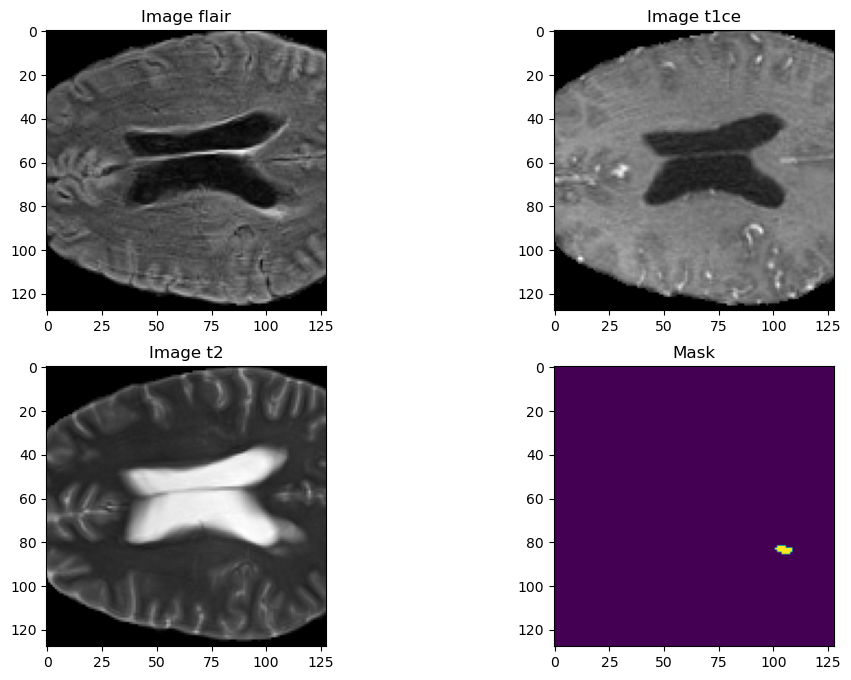

In [25]:
import os
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random



####################################################
train_img_dir = "Little_brats2023\\input_data_128\\train\\images"
train_mask_dir = "Little_brats2023\\input_data_128\\train\\masks"

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir + '\\' + img_list[img_num])
test_mask = np.load(train_mask_dir + '\\' + msk_list[img_num])
print(test_mask.shape)
test_mask = np.argmax(test_mask, axis=3)
print(test_mask.shape)
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [26]:
#Fit the model

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size


# from  simple_3d_unet import simple_unet_model

model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,
                          IMG_DEPTH=128,
                          IMG_CHANNELS=3,
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_38 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_2[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128, 128,  │          0 │ conv3d_38[0][0]   │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_39 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_18[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_8     │ (None, 64, 64,    │          0 │ conv3d_39[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_40 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_8[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64, 64,    │          0 │ conv3d_40[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_41 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_19[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_9     │ (None, 32, 32,    │          0 │ conv3d_41[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_42 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_9[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 32, 32,    │          0 │ conv3d_42[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_43 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_20[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_10    │ (None, 16, 16,    │          0 │ conv3d_43[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_44 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_10… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 16, 16,    │          0 │ conv3d_44[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_45 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_21[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_11    │ (None, 8, 8, 8,   │          0 │ conv3d_45[0][0] 

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_38 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_2[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128, 128,  │          0 │ conv3d_38[0][0]   │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_39 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_18[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_8     │ (None, 64, 64,    │          0 │ conv3d_39[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_40 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_8[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64, 64,    │          0 │ conv3d_40[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_41 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_19[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_9     │ (None, 32, 32,    │          0 │ conv3d_41[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_42 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_9[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 32, 32,    │          0 │ conv3d_42[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_43 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_20[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_10    │ (None, 16, 16,    │          0 │ conv3d_43[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_44 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_10… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 16, 16,    │          0 │ conv3d_44[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_45 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_21[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_11    │ (None, 8, 8, 8,   │          0 │ conv3d_45[0][0] 

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

None
(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)
Epoch 1/100
  6/260 ━━━━━━━━━━━━━━━━━━━━ 23:51 6s/step - accuracy: 0.3219 - iou_score: 0.0019 - loss: 1.0169    

KeyboardInterrupt: 

In [10]:
import tensorflow as tf
import segmentation_models_3D as sm
import numpy as np
import keras

# Definisci i pesi delle classi per DiceLoss
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

# Funzione wrapper per la perdita combinata
def dice_loss_plus_1focal_loss():
    return dice_loss + (1 * focal_loss)

# Funzione per ricostruire SumOfLosses
def sum_of_losses_from_config(config):
    return dice_loss_plus_1focal_loss()

# Funzione per ricostruire IOUScore
def iou_score_from_config(config):
    return sm.metrics.IOUScore(threshold=0.5)

# Mappa dei tuoi oggetti personalizzati
custom_objects = {
    'DiceLoss': sm.losses.DiceLoss,
    'CategoricalFocalLoss': sm.losses.CategoricalFocalLoss,
    'SumOfLosses': sum_of_losses_from_config,  # Simula il metodo from_config
    'dice_loss_plus_1focal_loss': dice_loss_plus_1focal_loss,
    'IOUScore': iou_score_from_config,  # Simula il metodo from_config
    'Adam': keras.optimizers.Adam,
}

# Carica il modello salvato
model = tf.keras.models.load_model(
    "C:\\Users\\simon\\Desktop\\Universita\\Tirocinio\\50epoch\\saved_model.keras",
    custom_objects=custom_objects
)

In [19]:

scaler = MinMaxScaler()

dir = "C:\\Users\\simon\\Desktop\\Universita\\Tirocinio\\brats2023\\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\\BraTS-GLI-00000-000"
t2 = glob.glob(dir + "\*t2w.nii.gz")
t1ce = glob.glob(dir + "\*t1c.nii.gz")
flair = glob.glob(dir + "\*t2f.nii.gz")
mask = glob.glob(dir + "\*seg.nii.gz")

print(t2, t1ce, flair)



['C:\\Users\\simon\\Desktop\\Universita\\Tirocinio\\brats2023\\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\\BraTS-GLI-00000-000\\BraTS-GLI-00000-000-t2w.nii.gz'] ['C:\\Users\\simon\\Desktop\\Universita\\Tirocinio\\brats2023\\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\\BraTS-GLI-00000-000\\BraTS-GLI-00000-000-t1c.nii.gz'] ['C:\\Users\\simon\\Desktop\\Universita\\Tirocinio\\brats2023\\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\\BraTS-GLI-00000-000\\BraTS-GLI-00000-000-t2f.nii.gz']


In [43]:

print('Preparing image and mask number')

temp_image_t2 = nib.load(t2[0]).get_fdata()
print(temp_image_t2.shape)
temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
print(temp_image_t2.shape)

temp_image_flair = nib.load(flair[0]).get_fdata()
temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

temp_image_t1c = nib.load(t1ce[0]).get_fdata()
temp_image_t1c = scaler.fit_transform(temp_image_t1c.reshape(-1, temp_image_t1c.shape[-1])).reshape(temp_image_t1c.shape)

temp_mask = nib.load(mask[0]).get_fdata()
temp_mask = temp_mask.astype(np.uint8)

temp_combined_images = np.stack([temp_image_flair, temp_image_t1c, temp_image_t2], axis = 3)

#crop to a size divisible by 64 to work later with patches by 64x64x64

temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
temp_mask = temp_mask[56:184, 56:184, 13:141]

val, counts = np.unique(temp_mask, return_counts=True)


print('Save me')
temp_mask = to_categorical(temp_mask, num_classes=4)
np.save('results/image.npy', temp_combined_images)
np.save('results/mask.npy', temp_mask)


Preparing image and mask number
(240, 240, 155)
(240, 240, 155)
Save me


In [44]:

test_img = np.load("results\image.npy")

test_mask = np.load("results\mask.npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

np.save('results/prediction.npy', test_prediction_argmax)



1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


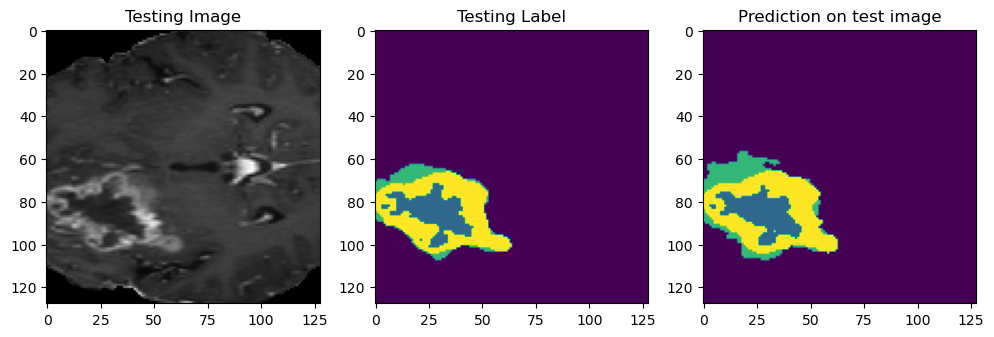

In [45]:

#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random


#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 57
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])